# Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used.


# example  : 

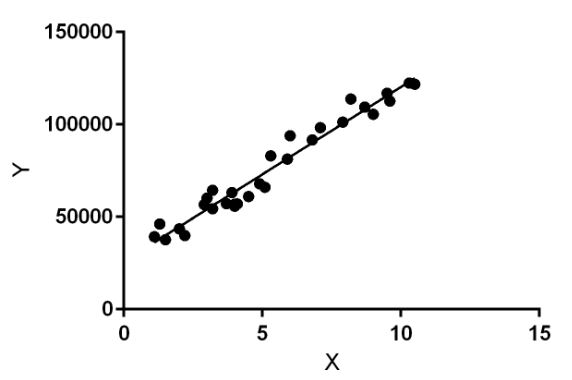

# y predicted formula

# $$ y = m*X + c $$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
data = {
    "x" : list(range(1, 8)),
    'y' : [1.5, 3.8, 6.7, 9.0, 11.2, 13.6, 16]
}
df = pd.DataFrame(data=data)
df

,x,y
0,1,1.5
1,2,3.8
2,3,6.7
3,4,9.0
4,5,11.2
5,6,13.6
6,7,16.0


# Finding M 

$$ m = \frac{(n * \sum_{i=0}^{n} X_{i} * Y_{i}) - (\sum_{i=0}^{n} X * \sum_{i=0}^{n} Y)}{(n*\sum_{i=0}^{n}X^{2}) - (\sum_{i=0}^{n}X)^{2}} $$

In [ ]:
df['sum_xy'] = df['x'] * df['y']
df['sqr_x'] = df['x'] ** 2
df

,x,y,sum_xy,sqr_x
0,1,1.5,1.5,1
1,2,3.8,7.6,4
2,3,6.7,20.1,9
3,4,9.0,36.0,16
4,5,11.2,56.0,25
5,6,13.6,81.6,36
6,7,16.0,112.0,49


In [ ]:
sum_xy = df['sum_xy'].sum()
sum_x = df['x'].sum()
sum_y =df['y'].sum()
sum_sqr_x = df['sqr_x'].sum()
sum_x_h_2 = sum_x ** 2 
n = len(df)

In [ ]:
sum_x, sum_y, sum_xy, sum_sqr_x, sum_x_h_2, n

(28, 61.800000000000004, 314.8, 140, 784, 7)

In [ ]:
numerator = (n*sum_xy) - (sum_x * sum_y)
numerator

473.1999999999998

In [ ]:
denominator = (n*sum_sqr_x) - sum_x_h_2
denominator

196

In [ ]:
m = numerator / denominator
m

2.4142857142857133

# finding b              $$ b = \frac{\sum_{i=0}^{n} Y_{i} - m * \sum_{i=0}^{n} X_{i}}{n} $$

In [ ]:
sum_x, sum_y, n,m

(28, 61.800000000000004, 7, 2.4142857142857133)

In [ ]:
numerator_b = ((sum_y) - (m * sum_x))
denominator_b = n
b = numerator_b / denominator_b
b

-0.8285714285714231

In [ ]:
m, b

(2.4142857142857133, -0.8285714285714231)

In [ ]:
y_org = df['y']
y_org

0     1.5
1     3.8
2     6.7
3     9.0
4    11.2
5    13.6
6    16.0
Name: y, dtype: float64

In [ ]:
y_pred = [(m*x_val) + b for x_val in df['x']]
y_pred

[1.5857142857142903,
 4.0000000000000036,
 6.414285714285717,
 8.82857142857143,
 11.242857142857142,
 13.657142857142857,
 16.07142857142857]

In [ ]:
df['y_pred'] = [(m*x_val) + b for x_val in df['x']]
df

,x,y,sum_xy,sqr_x,y_pred
0,1,1.5,1.5,1,1.585714
1,2,3.8,7.6,4,4.000000
2,3,6.7,20.1,9,6.414286
3,4,9.0,36.0,16,8.828571
4,5,11.2,56.0,25,11.242857
5,6,13.6,81.6,36,13.657143
6,7,16.0,112.0,49,16.071429


# Squared Error

$$ ss = \sum_{i=0}^{n} (Y_{org} - y_{pred}) ^ {2} $$

In [ ]:
se = sum([(yorg - ypred)**2 for yorg, ypred in zip(df['y'], df['y_pred'])]) / n
se

0.024081632653061246

# linear regression in oops  

In [ ]:
class linear_regression:


    def __init__(self,df):                              # taken all values in formula
        self.n=len(df)
        self.sum_x=df['x'].sum()
        self.sum_y=df['y'].sum()
        self.sum_xy=df['sum_xy'].sum()
        self.sum_sqr_x_=df['sqr_x'].sum()
        self.sum_x_h_2= sum_x ** 2


    def m_val(self,n,sum_x,sum_y,sum_xy,sum_x2,sum_x_h_2):    # finding m value in y=mx+b
        self.numerator_m = n*((sum_xy)) - (sum_x)*(sum_y)
        self.denominator_m = n*(sum_x2) - (sum_x_h_2)
        self.m = self.numerator_m / self.denominator_m
        return self.m


    def b_val (self,n,sum_x,sum_y):                           # finfing b value in y=mx+b
        self.numerator_b = (sum_y) - m*(sum_x)
        self.denominator_b = n
        self.b = self.numerator_b / self.denominator_b
        return self.b


    def fit_train(self,m,b,df):                                # finf y pred value in y=mx+b
        self.y_pred = [(m*x_val) + b  for x_val in df['x']]
        return self.y_pred


    def mse_val (self,df,y_pred):                               # find mean square error mse
        diff1=[]

        for y_org, y_pred in zip(df['y'],y_pred):
    
            diff=(y_org - y_pred) ** 2
            diff1.append(diff)
        
        ss1=sum(diff1)
        mse=ss1/n
        return mse

    def mae_val(self,df,y_pred):                          # finding mean absolue error mae
        diff1=[]

        for y_org, y_pred in zip(df['y'],y_pred):
            
            diff = abs(y_org - y_pred)                 # here using abs for exponential
            diff1.append(diff)

        ss2=sum(diff1)
        mae=ss2/n
        return mae



In [ ]:
obj_m=linear_regression(df)
obj_m.m_val(n,sum_x,sum_y,sum_xy, sum_sqr_x, sum_x_h_2)
print('m value is :', m)


m value is : 2.4142857142857133


In [ ]:
obj_b=linear_regression(df)
obj_b.b_val(n, sum_x,sum_y)
print('b value is :', b)

b value is : -0.8285714285714231


In [ ]:
obj_y_pred=linear_regression(df)
obj_y_pred.fit_train(m,b,df)
print('y predict values is:', y_pred)

y predict values is: [1.5857142857142903, 4.0000000000000036, 6.414285714285717, 8.82857142857143, 11.242857142857142, 13.657142857142857, 16.07142857142857]


# mean sqaure error = ((sum of y orirginal) - (sum of y predicted))**2  / length of dataframe

obj_mse=linear_regression(df)
mse=obj_mse.mse_val(df,y_pred)
print('mean square error is :',mse)

# mean absolute error = ((sum of y orirginal) - (sum of y predicted))  / length of dataframe  then after apply logarithm

In [ ]:
obj_mae=linear_regression(df)
mae=obj_mae.mae_val(df,y_pred)
print('mean absolute error is :',mae)

mean absolute error is : 0.13061224489795956


# data visualization using matplotlib

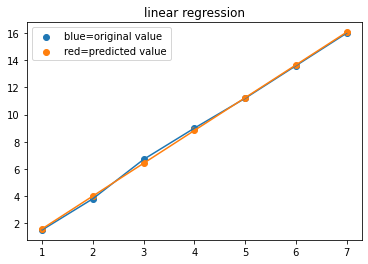

In [ ]:
## data visualization 
import matplotlib.pyplot as plt

x_val=df['x']
y_org=df['y']
y_pred=y_pred

plt.plot(x_val,y_org)
plt.plot(x_val,y_pred)
plt.scatter(x_val,y_org,label='blue=original value')
plt.scatter(x_val,y_pred,label='red=predicted value')
plt.title('linear regression')
plt.legend()
plt.show()